In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('bike sharing_Dataset.csv')

In [4]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,432946,406,8/31/14 22:31,Mountain View Caltrain Station,28,8/31/14 22:38,Castro Street and El Camino Real,32,17,Subscriber,94040
1,432945,468,8/31/14 22:07,Beale at Market,56,8/31/14 22:15,Market at 4th,76,509,Customer,11231
2,432944,534,8/31/14 22:06,Beale at Market,56,8/31/14 22:15,Market at 4th,76,342,Customer,11231
3,432942,1041,8/31/14 21:45,Embarcadero at Sansome,60,8/31/14 22:02,Steuart at Market,74,603,Customer,94521
4,432941,1091,8/31/14 21:44,Embarcadero at Sansome,60,8/31/14 22:02,Steuart at Market,74,598,Customer,94521


In [5]:
df.dtypes

Trip ID             int64
Duration            int64
Start Date         object
Start Station      object
Start Terminal      int64
End Date           object
End Station        object
End Terminal        int64
Bike #              int64
Subscriber Type    object
Zip Code           object
dtype: object

###### Convert variables to the right data types:

In [19]:
df[['Start Terminal', 'End Terminal', 'Bike #']] = df[['Start Terminal', 'End Terminal', 'Bike #']].astype(str)

In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [20]:
df.dtypes

Trip ID                     int64
Duration                    int64
Start Date         datetime64[ns]
Start Station              object
Start Terminal             object
End Date           datetime64[ns]
End Station                object
End Terminal               object
Bike #                     object
Subscriber Type            object
Zip Code                   object
Month                      object
dtype: object

In [9]:
df[df['End Date'].dt.month != df['Start Date'].dt.month]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
177,432713,86143,2014-08-31 16:13:00,Market at 10th,67,2014-09-01 16:09:00,Market at 10th,67,572,Customer,95814
279,432572,78922,2014-08-31 12:57:00,Market at 10th,67,2014-09-01 10:52:00,Market at 10th,67,627,Customer,60462
280,432571,78947,2014-08-31 12:56:00,Market at 10th,67,2014-09-01 10:52:00,Market at 10th,67,618,Customer,60462
463,432324,113622,2014-08-31 05:41:00,Washington at Kearny,46,2014-09-01 13:14:00,Temporary Transbay Terminal (Howard at Beale),55,354,Customer,nil
469,432317,104344,2014-08-31 03:09:00,Washington at Kearny,46,2014-09-01 08:08:00,Mechanics Plaza (Market at Battery),75,370,Customer,nil
31215,389577,674,2014-07-31 23:49:00,2nd at Folsom,62,2014-08-01 00:01:00,San Francisco Caltrain (Townsend at 4th),70,387,Subscriber,94401
31220,389571,72972,2014-07-31 23:05:00,California Ave Caltrain Station,36,2014-08-01 19:21:00,California Ave Caltrain Station,36,295,Customer,96708
31265,389511,49438,2014-07-31 20:36:00,Post at Kearny,47,2014-08-01 10:20:00,Golden Gate at Polk,59,458,Subscriber,94109
62708,345640,57078,2014-06-30 18:11:00,San Pedro Square,6,2014-07-01 10:02:00,Santa Clara at Almaden,4,645,Customer,91377
62711,345637,57134,2014-06-30 18:10:00,San Pedro Square,6,2014-07-01 10:02:00,Santa Clara at Almaden,4,93,Customer,91377


*Few rows have start month not equal to end month. I will just use the start month as the month of rent.*

In [10]:
df['Month'] = df['Start Date'].dt.strftime('%b')

In [22]:
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Month
0,432946,406,2014-08-31 22:31:00,Mountain View Caltrain Station,28,2014-08-31 22:38:00,Castro Street and El Camino Real,32,17,Subscriber,94040,Aug
1,432945,468,2014-08-31 22:07:00,Beale at Market,56,2014-08-31 22:15:00,Market at 4th,76,509,Customer,11231,Aug
2,432944,534,2014-08-31 22:06:00,Beale at Market,56,2014-08-31 22:15:00,Market at 4th,76,342,Customer,11231,Aug
3,432942,1041,2014-08-31 21:45:00,Embarcadero at Sansome,60,2014-08-31 22:02:00,Steuart at Market,74,603,Customer,94521,Aug
4,432941,1091,2014-08-31 21:44:00,Embarcadero at Sansome,60,2014-08-31 22:02:00,Steuart at Market,74,598,Customer,94521,Aug


###### Summary of the data

In [25]:
df['Duration'].describe()

count    171792.000000
mean       1132.514250
std        6084.234943
min          60.000000
25%         345.000000
50%         517.000000
75%         761.000000
max      716480.000000
Name: Duration, dtype: float64

In [26]:
df.describe(include = ['O'])

,Start Station,Start Terminal,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Month
count,171792,171792,171792,171792,171792,171792,171581,171792
unique,70,70,70,70,681,2,3526,6
top,San Francisco Caltrain (Townsend at 4th),70,San Francisco Caltrain (Townsend at 4th),70,558,Subscriber,94107,Jul
freq,12950,12950,16732,16732,569,142882,16179,31279


In [27]:
df.describe(include = [np.datetime64])

,Start Date,End Date
count,171792,171792
unique,93171,92115
top,2014-08-07 08:45:00,2014-07-15 08:49:00
freq,15,13
first,2014-03-01 00:14:00,2014-03-01 00:17:00
last,2014-08-31 22:31:00,2014-09-01 16:09:00


## 1. How does trip duration vary for subscribers vs customers? Analyze the variation in avg trip duration for subscribers vs customers from March-August ?

In [28]:
df.groupby(['Subscriber Type', 'Month'], sort=False)['Duration'].mean().unstack()

Month,Aug,Jul,Jun,May,Apr,Mar
Subscriber Type,,,,,,
Subscriber,549.663765,571.535653,609.325686,560.765496,581.541377,573.606539
Customer,3827.787528,3914.607337,3886.880174,3754.240585,3962.882929,4057.515839


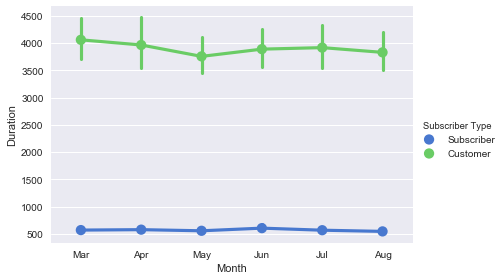

In [29]:
sns.factorplot(x="Month", y="Duration", hue="Subscriber Type", data=df, 
               order=['Mar','Apr','May','Jun','Jul','Aug'], aspect=1.5, palette='muted');

*We can obviously see that customers have much higher mean trip duration.*

## 2. Mostly popular start stations for subscribers vs customers

In [30]:
df.groupby(['Subscriber Type', 'Start Station']).size().groupby(level=0).nlargest()

Subscriber Type  Subscriber Type  Start Station                                
Customer         Customer         Embarcadero at Sansome                            3002
                                  Harry Bridges Plaza (Ferry Building)              2735
                                  Market at 4th                                     1208
                                  Powell Street BART                                1083
                                  Embarcadero at Vallejo                            1046
Subscriber       Subscriber       San Francisco Caltrain (Townsend at 4th)         12077
                                  San Francisco Caltrain 2 (330 Townsend)           6573
                                  Temporary Transbay Terminal (Howard at Beale)     6297
                                  Market at Sansome                                 5996
                                  2nd at Townsend                                   5889
dtype: int64

*We can see that subscribers and customers have totally different favoriate stations.*

In [31]:
top_stn = df.groupby(['Subscriber Type', 'Start Station']).size().groupby(level=0).nlargest()\
    .index.get_level_values('Start Station').tolist()

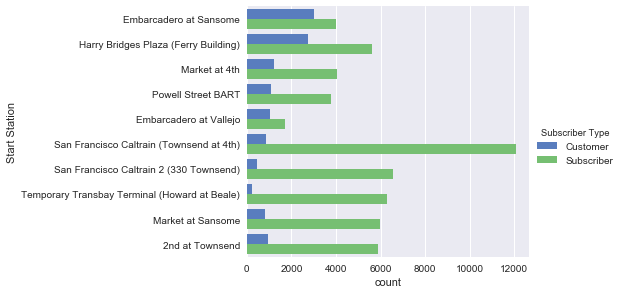

In [33]:
sns.factorplot(y="Start Station", hue="Subscriber Type", data=df, kind='count',
               order=top_stn, hue_order=['Customer','Subscriber'], aspect = 2, palette='muted');

## 3. Which station generates the longest ride ? Does this change as we go through various months ie March- August?

In [34]:
df.groupby(['Month', 'Start Station'], sort=False)['Duration'].mean().groupby(level=0).nlargest(1)

Month  Month  Start Station                        
Aug    Aug    Rengstorff Avenue / California Street    10689.169231
Jul    Jul    Arena Green / SAP Center                 11754.202381
Jun    Jun    San Mateo County Center                  13804.500000
May    May    Castro Street and El Camino Real          7786.224490
Apr    Apr    Redwood City Public Library              15592.000000
Mar    Mar    Santa Clara County Civic Center          20175.444444
Name: Duration, dtype: float64

In [35]:
long_stn = df.groupby(['Month', 'Start Station'], sort=False)['Duration'].mean().groupby(level=0).nlargest(1)\
    .index.get_level_values('Start Station').tolist()[::-1]

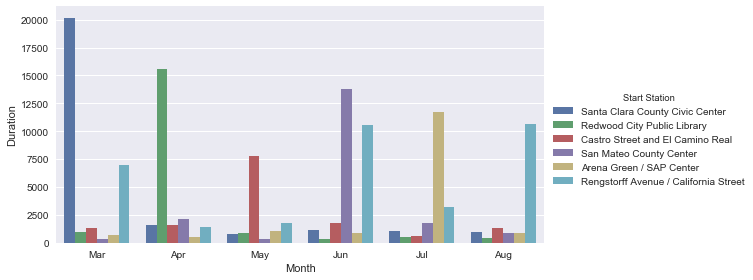

In [37]:
sns.factorplot(x='Month', y="Duration", hue="Start Station", data=df, kind='bar', ci=None,\
               order=['Mar','Apr','May','Jun','Jul','Aug'], hue_order=long_stn, aspect = 2);

The overall longest ride is from station "Santa Clara County Civic Center" in May.
And this changes among months, for each month, the longest duration was generated from different stations.

## 4. How does bike demand vary by time of the day? Does this pattern hold for both weekdays and weekends ? 

In [38]:
df['Hour'] = df['Start Date'].dt.strftime('%H')
df['Weekday'] = df['Start Date'].dt.strftime('%a')

In [39]:
demand_df = df.groupby(['Hour', 'Weekday'], sort=False)['Start Date'].size().to_frame('Demand').reset_index()

In [40]:
demand_df.head()

,Hour,Weekday,Demand
0,22,Sun,137
1,21,Sun,202
2,20,Sun,351
3,19,Sun,551
4,18,Sun,730


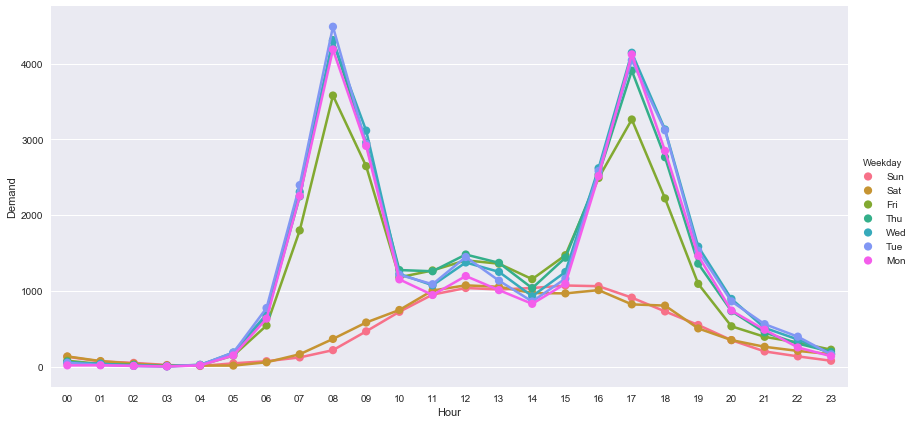

In [41]:
sns.factorplot(data=demand_df, x="Hour", y='Demand', hue='Weekday', kind="point", size=6, aspect=2, 
               palette=sns.color_palette("husl", 7), scale=.8); 

During weekdays, the demand is very high during the rush hours.
For both weekdays and weekends, we have higher demands from late morning to afternoon.